In [59]:
from sklearn.datasets import make_classification
import numpy as np 
X, y = make_classification(n_samples=100,n_features=2, n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

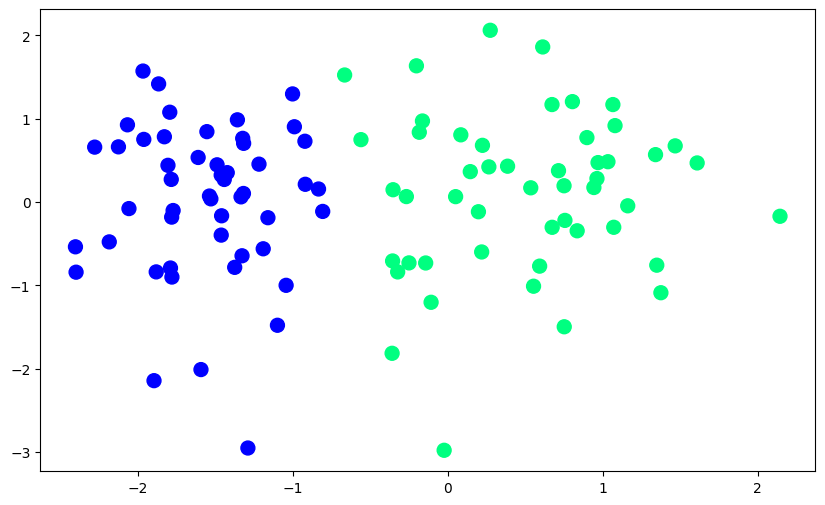

In [60]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)


In [61]:
X.shape

(100, 2)

In [62]:
y.shape

(100,)

In [63]:
def step(z):
    return 1 if z>0 else 0

In [64]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(1,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    
    return weights[0],weights[1:]

In [66]:
intercept_,coef_ = perceptron(X,y)
print(intercept_)
print(coef_)

1.0
[1.36439455 0.20993201]


In [67]:
m = - (coef_[0]/coef_[1])
c = - (intercept_/coef_[1])
print(m)
print(c)

-6.499221030904642
-4.763446945672075


In [72]:
X_input = np.linspace(-3,3,100)
y_input = m*X_input + c

(-3.0, 2.0)

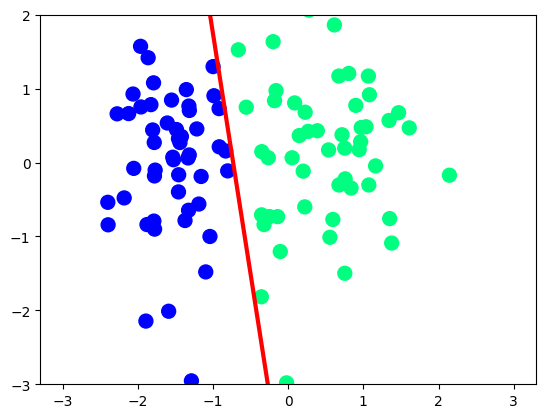

In [73]:
plt.plot(X_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [ ]:
# Problem in perceptron is that we cant say that the line that we got is the best line 

In [74]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [75]:
lr.intercept_

array([2.25106636])

In [76]:
lr.coef_

array([[3.50144121, 0.02773483]])

In [79]:
lr.coef_[0][0]

3.501441206077956

In [82]:
m = - (lr.coef_[0][0]/lr.coef_[0][1])
b = - (lr.intercept_/lr.coef_[0][1])

In [84]:
X_inputlr = np.linspace(-3,3,100)
y_inputlr = m*X_inputlr + b

(-3.0, 2.0)

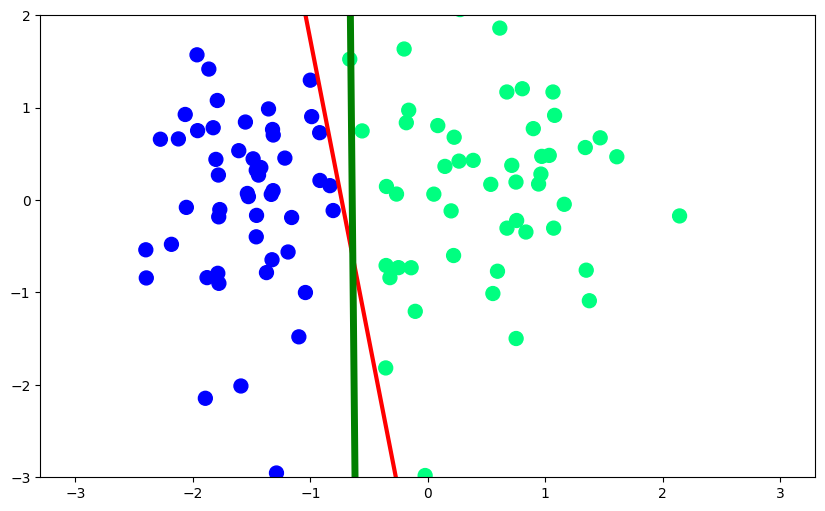

In [86]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color='red',linewidth=3)
plt.plot(X_inputlr,y_inputlr,color='green',linewidth='5')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)